# Data Analysis on MNIST Dataset

Data Analysis on MNIST Dataset by applying SVM, Logistic Regression and Neural Network.

# 1. Dataset Information

## 1.1 Introduction

The MNIST database (Modified National Institute of Standards and Technology database) is a large database containing handwritten digits. The dataset is commonly used for training various image processing systems as well as training and testing in the field of machine learning. It was created by re-mixing the samples from NIST's original datasets [1].

## 1.2 History

The MNIST database was originated from NIST’s Special Database 3 as training set and Special Database 1 as test set. Those databases also included images of handwritten digits. However, while SD-3 was much cleaner and easy to understand, SD-1 had complex writings. The reason was SD-3 was collected by Census Bureau employees and SD-1 was by high-school students. According to the creators of MNIST dataset this contradiction resulted a need to build a new dataset by mixing the original ones [2].

In the image below you can see one of the samples used in NIST dataset back in 1980's [3].

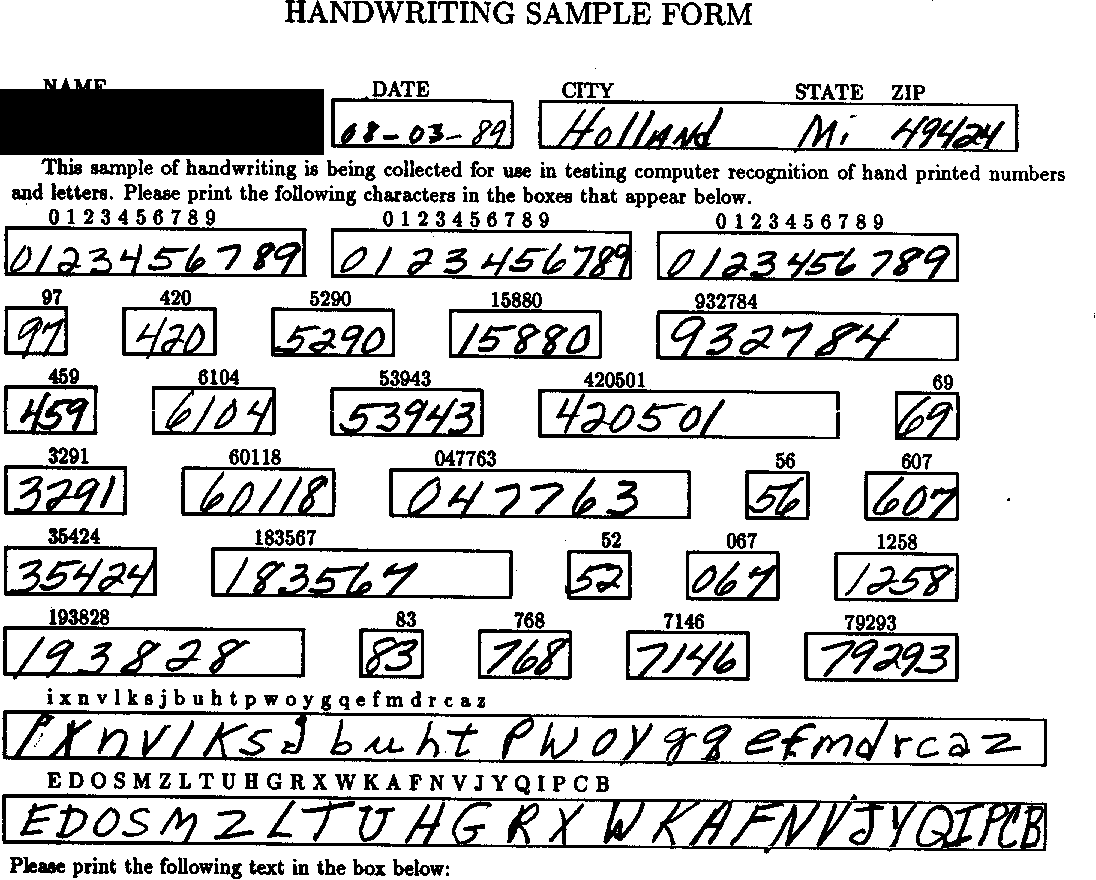

## 1.3 Overview of the Data

The original images from NIST dataset have 20x20 pixels. However, in MNIST the black-white matrix elements were centraled for a 28x28 pixel format. Also, test and trainings datas are combination of SD-1 and SD-3. In SD-1 there were scrambled digit images of 500 different writers. The creators of the MNIST, using the writer identities, gathered the digits in sequence again. Half of the new SD-1 was combined with some portion of SD-3 and together they formed the new training set. Similarly, the other half of SD-1 was completed with SD-3 and they became the new test set. Thus, nearly 60,000 test and training datas were re-organized during the establishment of MNIST. Nevertheless, only 10,000 test images(5,000 from SD-1 and 5,000 from SD-3) are available to use, since it is enough when it is compared to 60,000 digits of training set [2].

A digit in the matrix format is designed to have elements from 0 to 1, representing the tone of the blackness and it looks like this:

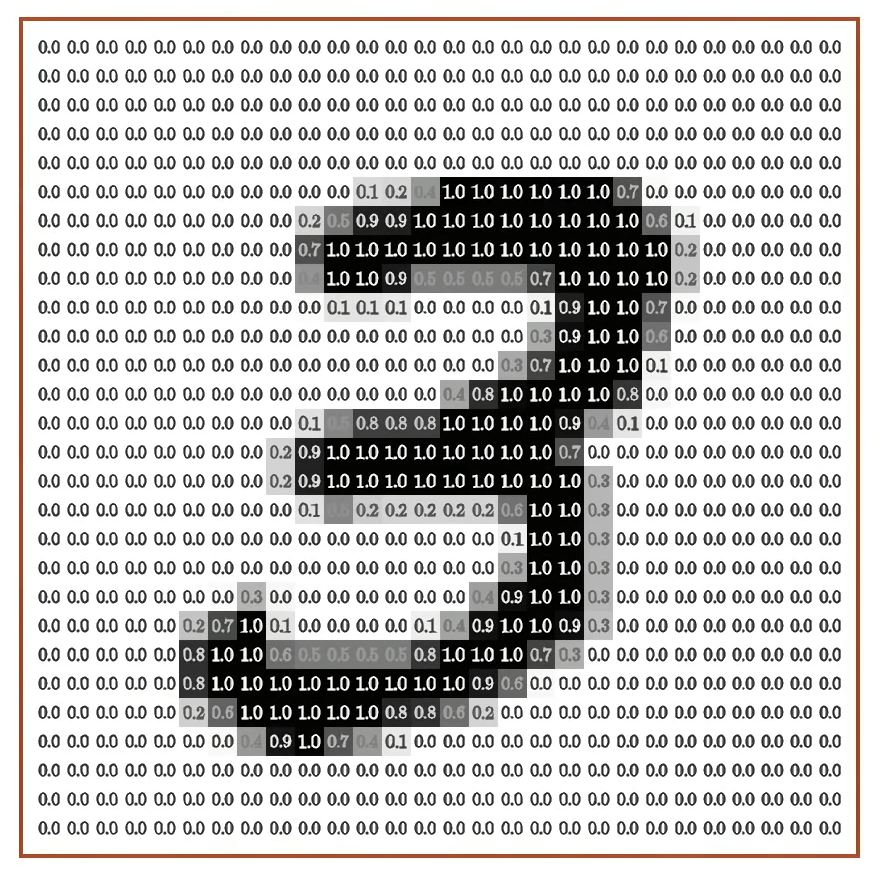

[Image taken from YouTube video "But what *is* a Neural Network" https://www.youtube.com/watch?v=aircAruvnKk]

As you can see, higher the value higher the blackness.

Now we need to import the MNIST data set. This is how we do it: 

The necessary files are already downloaded. By calling those files, test and training sets are assigned. 

In [7]:
from mlxtend.data import loadlocal_mnist

test_data, test_label = loadlocal_mnist(images_path='C:/Users/azad/Desktop/MNIST/t10k-images.idx3-ubyte', labels_path='C:/Users/azad/Desktop/MNIST/t10k-labels.idx1-ubyte')
train_data, train_label = loadlocal_mnist(images_path='C:/Users/azad/Desktop/MNIST/train-images.idx3-ubyte', labels_path='C:/Users/azad/Desktop/MNIST/train-labels.idx1-ubyte')

Let's check the size of the data. As you can see the train data set is huge while test data set is considerably smaller.

In [8]:
train_data.shape

(60000, 784)

In [9]:
train_label.shape

(60000,)

In [10]:
test_data.shape

(10000, 784)

In [11]:
test_label.shape

(10000,)

However, becase training set is huge it is expensive to work with those datas. Instead, we will use the test images and test label set. We call them as X and Y.

In [12]:
X, Y = loadlocal_mnist(images_path='C:/Users/azad/Desktop/MNIST/t10k-images.idx3-ubyte', labels_path='C:/Users/azad/Desktop/MNIST/t10k-labels.idx1-ubyte')

In [13]:
X.shape

(10000, 784)

In [14]:
Y.shape

(10000,)

It is always fun to visualize and see the physical state of the data. In fact, MNIST dataset is a numerical data but with coloring we can see the actual drawing of the integer. Now let's see how a random integer looks like.

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

from random import randint
rand = randint(0, len(X))

image = X[rand,:]
label = Y[rand]

In [16]:
plottable_image = np.reshape(image, (28, 28))

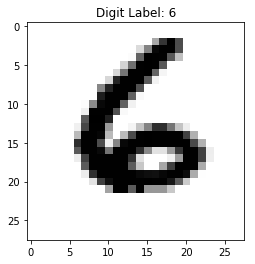

In [17]:
plt.imshow(plottable_image, cmap='gray_r')
plt.title('Digit Label: {}'.format(label))
plt.show()

# 2. Support Vector Machines

## 2.1 Introduction

Support Vector Machines are supervised learning models for classification problems. The general method is to set a hyperplane between data points which are labeled to different classes. For separable points which are scattered in a space, the method is developed such that a maximum length of margin can be found and placed between the points of different classes. However, a hyperplane may not always separate complex data. In case of a nonlinear separation, a kernel function is used to transform the data to be lienarly separable.

## 2.2 History

The history of Support Vector Machines goes back to 1992 with a paper called "A Training Algorithm for
Optimal Margin Classier" by Bernhard E. Bos, Isabelle M. Guyon and Vladimir N. Vapnik . This was very close to the current form of SVM we use now. In the paper, idea of margins were introduced and the formulas to maximize the margin between datapoints were given with experiments[http://www.svms.org/history.html]. Three years later Corinna Cortes and Vladimir Vapnik came up with "Support-Vector Networks".

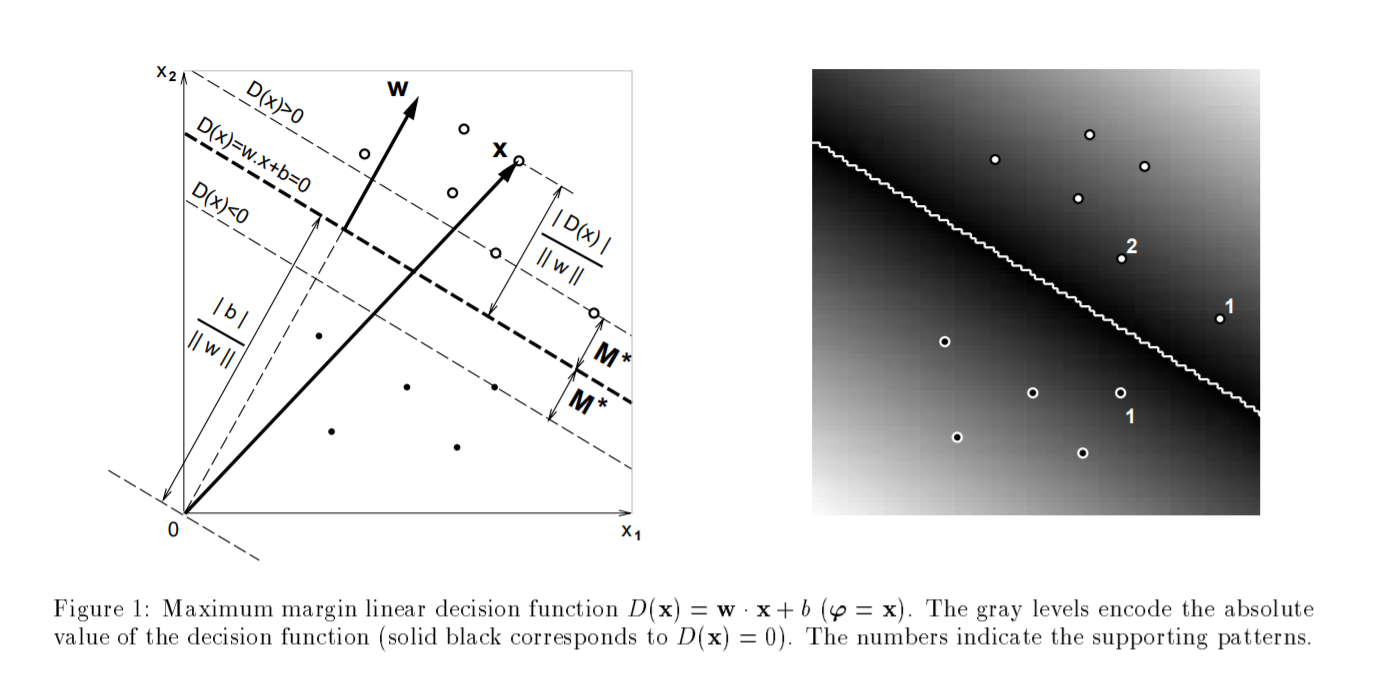

Above you can see a figure from "A Training Algorithm for Optimal Margin Classier" showing the elements of maximum margin linear decision formula with an example data classification next to it [http://www.svms.org/training/BOGV92.pdf]

## 2.3 About the Method

Assume that we have L inputs or data points as x's and labels of two classes as -1 and 1 that are shown with y's. So we have


\begin{align*}
\{x_i, y_i\} \ where \quad i=1,\ldots, L \quad and \quad y_i\in \{-1,1\},\ x\in\mathbb{R}^D 
\end{align*}

Suppose our data is linearly separable, it means that we can draw a line on graph between $ y_1 $ and $ y_2 $ values. In order to do that we need to have a formula. And that is

\begin{align*}
& w  \cdot x +b = 0 \quad  where \\
& \bullet \ w \ is \ a \ normal \ to \ the \ hyperline, \\
& \bullet \frac{b}{||w||}  \ is \ the \ perpendicular \ distance \ from \ the \ hyperplane \ to \ the \ origin.
\end{align*}

Is w really orthogonal to the hyperline? Take a look at the figure below.

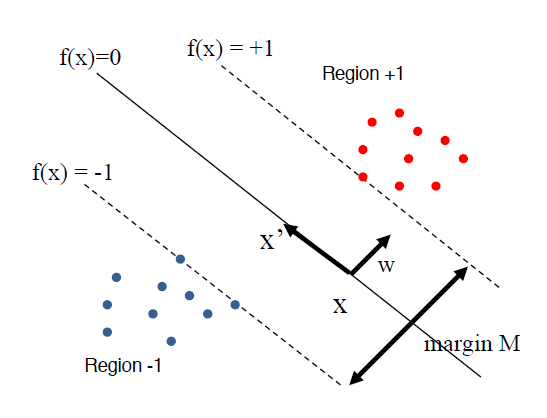

\begin{align*}
w \cdot x +b = 0 \quad and \quad w \cdot x' -b = 0\ \Longrightarrow \ \ w \cdot (x-x') = 0 \\
\end{align*}

[Prof. Alexander Ihler, CS178: Machine Learning and Data Mining Support Vector Machines]

Also, below the points of classes 1 and 2 are linearly separated by a hyperline between the inputs of different classes. The closest points are categorized as $H_1$ and $H_2$. The normal vector and the margins are also shown.

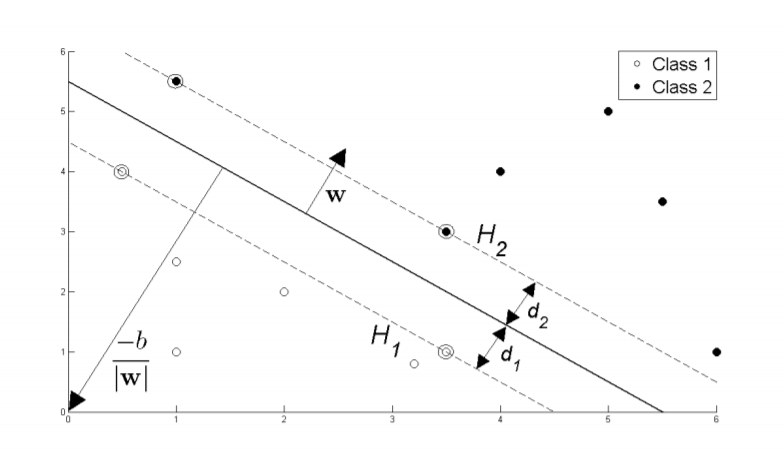

The two closest points $ H_1 $ and $ H_2 $ which belong to different classes are described with the functions:

\begin{align*}
x_i \cdot w + b = +1 \quad for \quad H_1 \\
x_i \cdot w + b = -1 \quad for \quad H_2 
\end{align*}

The classes are separated as -1 and 1. So a function is needed to decide which points belong to which class. And the function whould produce only -1 and 1.

\begin{align*}
x_i \cdot w +b \geq +1 \quad for \quad y_i  = +1 \\
x_i \cdot w +b \leq -1 \quad for \quad y_i  = -1
\end{align*}

To have the most optimal margin between the closest data points of different classes we need to maximize the margin. If we take margin as $ d_1 $ or $ d_2 $ where $ d_1 = d_2 $ and $ d_1 + d_2 = M $ this leads us to an optimization problem.

Thanks to simple vector geometry the margin is equal to $ \frac{1}{||w||} $. Thus we need to minimize $ ||w|| $ such that  $ \ y_i(x_i \cdot w + b) -1 \geq 0 \ \forall_i $.

Minimizing $ ||w|| $ is equivalent to minimizing $ \frac{1}{2} ||w||^2 $ and this transformation provides the use of Quadratic Programming Optimization. Thus we need to find:

\begin{align*}
min \ \frac{1}{2} ||w||^2 \ \ such \ that \ \  \ y_i(x_i \cdot w + b) -1 \geq 0 \ \ \forall_i 
\end{align*}

In order to provide the constants in this minimization, we need to separate
them with Lagrange multipliers alpha, where $ \alpha_i \geq 0 \ \ \forall i$ .

\begin{align*}
L_P \equiv & \frac{1}{2} ||w||^2 - \alpha [ y_i ( x_i \cdot w + b ) - 1 \ \forall i] \\
\equiv & \frac{1}{2} ||w||^2 - \displaystyle\sum_{i=1}^{L} \alpha_i [ y_i ( x_i \cdot w + b ) - 1] \\
\equiv & \frac{1}{2} ||w||^2 - \displaystyle\sum_{i=1}^{L} \alpha_i y_i( x_i \cdot w + b ) + \displaystyle\sum_{i=1}^{L} \alpha_i 
\end{align*}

Differentiating $ L_P $ with respect to $ w $ and $ b $ and setting the derivatives to zero:

\begin{align*}
& \frac{\partial L_P}{\partial w} = 0 \implies w = \displaystyle\sum_{i=1}^{L} \alpha_i y_i x_i \ \ *\\
& \frac{\partial L_P}{\partial b} = 0 \implies \displaystyle\sum_{i=1}^{L} \alpha_i y_i = 0 \ \ **
\end{align*}

We get a new formulation

\begin{align*}
L_D \equiv & \displaystyle\sum_{i=1}^{L} \alpha_i - \frac{1}{2} \displaystyle\sum_{i,j} \alpha_i \alpha_j y_i y_j x_i \cdot x_j \quad such \ that  \quad   \alpha_i \geq 0 \ \ \forall i , \displaystyle\sum_{i=1}^{L} \alpha_i y_i = 0 \\
\equiv & \displaystyle\sum_{i=1}^{L} \alpha_i - \frac{1}{2} \displaystyle\sum_{i,j} \alpha_i H_{ij} \alpha_j \ \ where  \ \ H_{ij} \equiv y_i y_j x_i \cdot x_j \\
\equiv & \displaystyle\sum_{i=1}^{L}\alpha_i - \frac{1}{2} \alpha^T H \alpha \ \  such \ that  \ \ \alpha_i \geq \forall i ,  \displaystyle\sum_{i=1}^{L}\alpha_i y_i = 0 
\end{align*}

Done with mimimizing LP and maximizing LD, now we need to find:

\begin{align*}
max \ [\displaystyle\sum_{i=1}^{L} \alpha_i - \frac{1}{2} \alpha^T H \alpha ] \quad  such \ that  \quad \alpha_i \geq 0 \quad \forall i \quad  and  \displaystyle\sum_{i=1}^{L} \alpha_i y_i = 0 
\end{align*}

Any data point satisfying $ * $  will have the form:

\begin{align*}
y_s (x_s \cdot w + b) = 1
\end{align*}

Substituting this in $ ** $

\begin{align*}
y_s(\displaystyle\sum_{m \in S}^{} \alpha_m y_m x_m \cdot x_s + b) = 1
\end{align*}

\begin{align*}
y^2_s(\displaystyle\sum_{m \in S}^{} \alpha_m y_m x_m \cdot x_s + b) = y_s
\end{align*}

\begin{align*}
b = y_s - \displaystyle\sum_{m \in S}^{} \alpha_m y_m x_m \cdot x_s
\end{align*}

\begin{align*}
b = \frac{1}{N_s} \displaystyle\sum_{s \in S}^{}(y_s - \displaystyle\sum_{m \in S}^{} \alpha_m y_m x_m \cdot x_s )
\end{align*}

[Tristan Fletcher, Support Vector Machines Explained, December 23, 2008]

### Soft Margin

We had defined our margin with the formula 

\begin{align*}
y_i(x_i \cdot w + b) -1 \geq 0 \ \forall_i 
\end{align*}

However, it is not always the case that we have perfectly separable data. Sometimes it is possible to get errors such as wrong data points in the wrong side of the hyperplane. In such cases it is beneficial to soften the margin. Better linear separators can be obtained by being less strict.

Thus, we add a new variable $ \varepsilon_i $ which we call * slack variables * . Slack variables represent the number of misclassifications in our model. 

\begin{align*}
& x_i \cdot w +b \geq +1 -\varepsilon \quad for \quad y_i  = +1 \\
& x_i \cdot w +b \leq -1 -\varepsilon \quad for \quad y_i  = -1 \quad where \ \varepsilon_i \geq 0 \\
\end{align*}

If we introduce these slack variables with a parameter C then the problem becomes

\begin{align*}
min \frac{1}{2} ||w||^2 + C \displaystyle\sum_{i=1}^{n} \varepsilon_i \quad such \ that \quad y_i(x_i \cdot w + b) \geq 1- \varepsilon_i \quad \forall_i , \varepsilon \geq 0
\end{align*}

[Bejar, Javier. "Support Vector Machines". 2012-2013, Powerpoint file]

Note: In the codes below it is preferred to have C = 2.

## 2.4 Application on MNIST

Before we start applying some Machine Learning methods on MNIST dataset we need to import some necessary packages.

In [2]:
import pandas as pd
import numpy as np
import math
import time

from sklearn import svm
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize

In [3]:
# Import packages to visualize the classifer
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import warnings

In [4]:
def scale_plot_size(factor):
    import matplotlib as mpl
    default_dpi = mpl.rcParamsDefault['figure.dpi']
    mpl.rcParams['figure.dpi'] = default_dpi*factor

## 2.4.1 Linear kernel

Linear SVM performs linear classification. It is simply drawing a line which is actually a hyperplane, between data points such that points belonging to opposite classes are separated.

Train and test data are splitted with 1 to 3 ratio. Train and label datapoints are fitted into SVM classifier with linear kernel and C = 0. The classifier algorithm returns a prediction out of the data it processed. These predictions are passed into the confusion matrix. For a statistically better result the whole process is repeated for 15 times. This way different test and training data are chosen for each iteration. Thus, a more balanced and fair analysis can be made. Also the whole process below is timed to see how long it takes to apply linear SVM on MNIST.

In [17]:
start = time.time()

sum_linear = np.zeros([10,10])
total_test_label = np.zeros((37500))
total_predicted_ys = np.zeros((37500))

for i in range(15):
    train_data, test_data, train_label, test_label = train_test_split(X, Y, test_size=0.25)
    classifier = svm.SVC(kernel='linear',C=2.0)
    classifier.fit(train_data,train_label)

    predicted_ys = classifier.predict(test_data)
    
    sum_linear = sum_linear + confusion_matrix(test_label, predicted_ys)
    
    
    total_test_label[(i*2500):((i+1)*2500)] = test_label
    total_predicted_ys[(i*2500):((i+1)*2500)] = predicted_ys
    
end = time.time()
time_linear = end - start
print(time_linear)

240.8634614944458


For the classification report those 15 iterations of classifications and predictions are combined. The algorithm
have processed total of 37,500 digits.

In [18]:
print(classification_report(total_test_label, total_predicted_ys))

             precision    recall  f1-score   support

        0.0       0.95      0.98      0.96      3613
        1.0       0.95      0.99      0.97      4193
        2.0       0.90      0.93      0.91      3932
        3.0       0.89      0.91      0.90      3733
        4.0       0.90      0.93      0.92      3647
        5.0       0.89      0.86      0.87      3381
        6.0       0.96      0.94      0.95      3639
        7.0       0.93      0.91      0.92      3829
        8.0       0.93      0.87      0.90      3705
        9.0       0.91      0.88      0.89      3828

avg / total       0.92      0.92      0.92     37500



Indeed, it is possible for the algorithm to never encounter an integer predicted as another one. So during the preparation of the codes sometimes, not often, I encountered NaN values in a few cells of the confusion matrix. Obviously this ruins the further calculation codes and visualizations. In order to get rid of this, the codes below check every element of the matrix and if find a NaN value, convert it into a zero.

In [19]:
def nan_to_zero(matrix):
    for i in range(10):
        for j in range(10):
            if math.isnan(matrix[i,j]) == True:
                matrix[i,j] = 0

Displaying matrices, in which we usually get float values, it is crucial to understand the elements perfectly. That is why all values are restricted up to 3 decimals by the code below. This convertion is needed, otherwise confusion matrices look complex and therefore hard to understand.

In [20]:
float_formatter = lambda x: "%.3f" % x
np.set_printoptions(formatter={'float_kind':float_formatter})

avg_lineer = np.arange(0,27,3).reshape(3,3).astype(np.float64)

Let's see what the average result is

In [21]:
avg_linear = sum_linear/15.0
avg_linear = np.around(avg_linear,3)
print(avg_linear)

[[235.133 0.000 0.333 0.667 0.200 1.533 1.933 0.400 0.667 0.000]
 [0.000 276.133 0.600 0.667 0.133 1.000 0.333 0.067 0.533 0.067]
 [2.133 3.000 243.333 2.133 3.000 0.800 1.733 2.267 3.000 0.733]
 [0.600 0.733 4.867 227.200 0.333 7.200 0.200 2.200 4.333 1.200]
 [0.333 0.200 2.800 0.267 227.133 0.400 1.400 1.067 0.867 8.667]
 [3.067 2.267 3.267 10.067 2.667 193.667 3.000 0.733 4.267 2.400]
 [2.067 0.667 3.933 0.133 2.400 3.533 229.000 0.267 0.600 0.000]
 [1.000 3.133 5.533 1.533 2.667 0.200 0.133 233.533 0.333 7.200]
 [1.133 4.000 4.533 8.200 1.533 8.000 1.533 1.333 214.267 2.467]
 [1.267 1.200 1.333 3.000 11.467 2.133 0.267 9.133 1.800 223.600]]


Normalizing the matrix allows us to see the percentages of the predictions, rather than counted values.

In [22]:
normalized_linear = normalize(avg_linear, axis=1, norm='l1')
print(normalized_linear)

[[0.976 0.000 0.001 0.003 0.001 0.006 0.008 0.002 0.003 0.000]
 [0.000 0.988 0.002 0.002 0.000 0.004 0.001 0.000 0.002 0.000]
 [0.008 0.011 0.928 0.008 0.011 0.003 0.007 0.009 0.011 0.003]
 [0.002 0.003 0.020 0.913 0.001 0.029 0.001 0.009 0.017 0.005]
 [0.001 0.001 0.012 0.001 0.934 0.002 0.006 0.004 0.004 0.036]
 [0.014 0.010 0.014 0.045 0.012 0.859 0.013 0.003 0.019 0.011]
 [0.009 0.003 0.016 0.001 0.010 0.015 0.944 0.001 0.002 0.000]
 [0.004 0.012 0.022 0.006 0.010 0.001 0.001 0.915 0.001 0.028]
 [0.005 0.016 0.018 0.033 0.006 0.032 0.006 0.005 0.867 0.010]
 [0.005 0.005 0.005 0.012 0.045 0.008 0.001 0.036 0.007 0.876]]


Digits are stored in a 1-dimensional matrix. We will need this to plot the confusion matrices.

In [23]:
digits = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]

Visualizing the percentages of how many times a digit is guessed correctly. This is a colorful way to see things better.

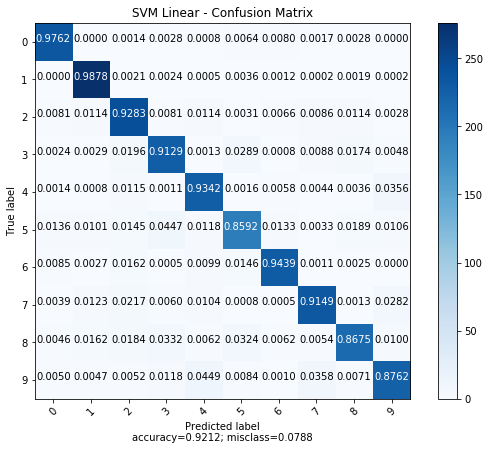

In [28]:
plot_confusion_matrix(avg_linear, 
                      normalize    = True,
                      target_names = digits,
                      title        = "SVM Linear - Confusion Matrix")

To see the percentage of the correctly predicted digits in a cleaner way, this is a simple function which stores the diagonal elements of the normalized matrix we just achieved and creates a new one dimensional array. So for each digit we can see the probability.

In [29]:
def digit_probability(norm_matrix):
    diagonal = np.zeros((10))
    sum = 0.0
    for i in range(10):
        for j in range(10):
            if (i==j):
                diagonal[i] = norm_matrix[i,j]
    return(diagonal)

Printing them next to each digit values they belong:

In [30]:
prob_linear = digit_probability(normalized_linear)    

for i in range(10):
    print(i, end=" => ") 
    print(prob_linear[i])

0 => 0.9761983841638089
1 => 0.9878368564713288
2 => 0.9282842232157844
3 => 0.9129411008333803
4 => 0.9341885544596806
5 => 0.859207105527014
6 => 0.9439406430338005
7 => 0.914864944273598
8 => 0.8674812448633396
9 => 0.8761755485893417


Below you see a function which basically finds the top 3 misidentification made by the algorithm. Checking every bit of the matrix and putting the diagonal ones aside, it finds the maximum values and prints these in a readable way.

In [31]:
maximum_misidentification(normalized_linear)

Apart from the diagonal elements of the confusion matrix:
While predicting the integer 9 , 4.493 % of the times the algorithm misidentified it as 4 and
while predicting the integer 5 , 4.466 % of the times the algorithm misidentified it as 3 and
while predicting the integer 4 , 3.565 % of the times the algorithm misidentified it as 9 .


## 2.4.3 Polynomial kernel

Every classification problem may not be solved by a linear hyperplane. In such cases applying
polynomial kernel can be very useful. Choosing the degree, it is possible to separate data points by a
polynom where a line cannot be perfectly placed between opposite ones.

### 2.4.3.1 Polynomial kernel with degree 2

Train and test data are splitted with 1 to 3 ratio. After setting the properties of the SVM classifier the input and label values of train data are fitted into SVM classifier with polynomial kernel degree 2. the algorithm returns a prediction out of the data it processed. These predictions are passed into the confusion matrix. Similar with the linear one, polynomial kernel is also carried out for 15 different times.

In this example the C value is chosen to be 2.

In [39]:
start = time.time()

sum_poly_d2 = np.zeros((10,10))
total_test_label = np.zeros((37500))
total_predicted_ys = np.zeros((37500))

for i in range(15):
    train_data, test_data, train_label, test_label = train_test_split(X, Y, test_size=0.25)
    classifier = svm.SVC(kernel='poly',C=2.0, degree = 2)
    classifier.fit(train_data,train_label)

    predicted_ys = classifier.predict(test_data)
    sum_poly_d2 = sum_poly_d2 + confusion_matrix(test_label,predicted_ys)
      
    total_test_label[(i*2500):((i+1)*2500)] = test_label
    total_predicted_ys[(i*2500):((i+1)*2500)] = predicted_ys
    
end = time.time()
time_poly_d2 = end - start
print(time_poly_d2)

260.602685213089


Classification report of the Polynomial kernel with degree 2 becomes

In [40]:
print(classification_report(total_test_label, total_predicted_ys))

             precision    recall  f1-score   support

        0.0       0.97      0.99      0.98      3674
        1.0       0.97      0.99      0.98      4276
        2.0       0.97      0.96      0.96      3931
        3.0       0.95      0.95      0.95      3734
        4.0       0.96      0.97      0.97      3718
        5.0       0.95      0.95      0.95      3303
        6.0       0.97      0.97      0.97      3588
        7.0       0.96      0.96      0.96      3823
        8.0       0.97      0.94      0.96      3604
        9.0       0.96      0.94      0.95      3849

avg / total       0.96      0.96      0.96     37500



By dividing the summed matrices into the number of times the algorithm worked average confusion matrix becomes

In [41]:
avg_poly_d2 = sum_poly_d2/15

print(avg_poly_d2)

[[241.733 0.067 0.000 0.267 0.000 1.067 1.267 0.067 0.400 0.067]
 [0.000 282.200 0.133 0.467 0.067 0.333 0.733 0.533 0.600 0.000]
 [1.333 1.000 251.000 2.267 1.133 0.333 1.067 2.667 0.800 0.467]
 [0.000 0.600 1.800 236.800 0.200 3.867 0.000 1.800 2.267 1.600]
 [0.533 0.067 0.600 0.067 240.800 0.133 0.533 0.667 0.733 3.733]
 [1.333 0.800 0.467 4.000 0.600 208.600 2.200 0.067 1.200 0.933]
 [1.733 0.800 0.400 0.133 1.000 1.333 232.933 0.267 0.467 0.133]
 [0.133 3.267 1.867 0.333 1.133 0.133 0.067 244.867 0.267 2.800]
 [0.600 0.600 2.067 3.067 1.133 3.533 0.467 1.133 226.600 1.067]
 [1.400 1.267 0.867 1.667 4.333 0.400 0.267 3.800 0.667 241.933]]


Getting it normalized, we get the following matrix

In [42]:
normalized_poly_d2 = normalize(avg_poly_d2, axis=1, norm='l1')
print(normalized_poly_d2)

[[0.987 0.000 0.000 0.001 0.000 0.004 0.005 0.000 0.002 0.000]
 [0.000 0.990 0.000 0.002 0.000 0.001 0.003 0.002 0.002 0.000]
 [0.005 0.004 0.958 0.009 0.004 0.001 0.004 0.010 0.003 0.002]
 [0.000 0.002 0.007 0.951 0.001 0.016 0.000 0.007 0.009 0.006]
 [0.002 0.000 0.002 0.000 0.971 0.001 0.002 0.003 0.003 0.015]
 [0.006 0.004 0.002 0.018 0.003 0.947 0.010 0.000 0.005 0.004]
 [0.007 0.003 0.002 0.001 0.004 0.006 0.974 0.001 0.002 0.001]
 [0.001 0.013 0.007 0.001 0.004 0.001 0.000 0.961 0.001 0.011]
 [0.002 0.002 0.009 0.013 0.005 0.015 0.002 0.005 0.943 0.004]
 [0.005 0.005 0.003 0.006 0.017 0.002 0.001 0.015 0.003 0.943]]


In [43]:
prob_poly_d2 = digit_probability(normalized_poly_d2)    

for i in range(10):
    print(i, end=" => ") 
    print(prob_poly_d2[i])

0 => 0.9869352204681545
1 => 0.9899438727782972
2 => 0.9577715593996439
3 => 0.9512587038028922
4 => 0.9714900484131255
5 => 0.9473206176203451
6 => 0.9738015607580824
7 => 0.9607637980643473
8 => 0.943118756936737
9 => 0.9428422967004416


In [44]:
maximum_misidentification(normalized_poly_d2)

Apart from the diagonal elements of the confusion matrix:
While predicting the integer 5 , 1.817 % of the times the algorithm misidentified it as 3 and
while predicting the integer 9 , 1.689 % of the times the algorithm misidentified it as 4 and
while predicting the integer 3 , 1.553 % of the times the algorithm misidentified it as 5 .


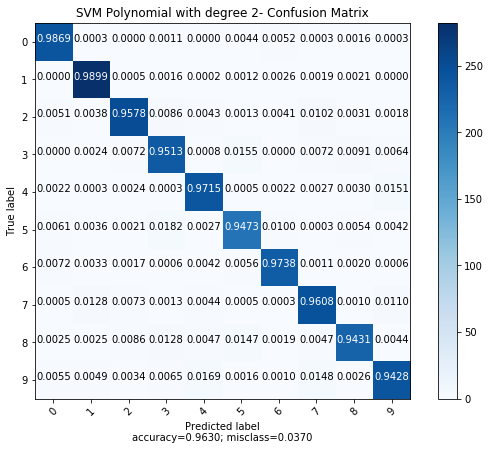

In [45]:
plot_confusion_matrix(avg_poly_d2, 
                      normalize    = True,
                      target_names = digits,
                      title        = "SVM Polynomial with degree 2- Confusion Matrix")

### 2.4.3.2 Polynomial kernel with degree 3

Again, train and test data are splitted with 1 to 3 ratio. After being fitted into SVM classifier with polynomial kernel the algorithm returns a prediction out of the data it processed. These predictions are passed into the confusion matrix. Similar with the one linear one, polynomail kernel is also carried out for 15 different times.

In this example the degree and C value are chosen as 3 and 2, respectively.

In [32]:
start = time.time()

sum_poly_d3 = np.zeros((10,10))
total_test_label = np.zeros((37500))
total_predicted_ys = np.zeros((37500))

for i in range(15):
    train_data, test_data, train_label, test_label = train_test_split(X, Y, test_size=0.25)
    classifier = svm.SVC(kernel='poly',C=2.0, degree = 3)
    classifier.fit(train_data,train_label)

    predicted_ys = classifier.predict(test_data)
    sum_poly_d3 = sum_poly_d3 + confusion_matrix(test_label,predicted_ys)
      
    total_test_label[(i*2500):((i+1)*2500)] = test_label
    total_predicted_ys[(i*2500):((i+1)*2500)] = predicted_ys
    
end = time.time()
time_poly_d3 = end - start
print(time_poly_d3)

282.68076848983765


Classification report of the polynomial kernel with degree 3:

In [33]:
print(classification_report(total_test_label, total_predicted_ys))

             precision    recall  f1-score   support

        0.0       0.96      0.98      0.97      3696
        1.0       0.95      0.99      0.97      4228
        2.0       0.96      0.95      0.95      3834
        3.0       0.94      0.94      0.94      3723
        4.0       0.96      0.96      0.96      3677
        5.0       0.95      0.93      0.94      3466
        6.0       0.96      0.97      0.96      3689
        7.0       0.95      0.95      0.95      3844
        8.0       0.96      0.93      0.94      3618
        9.0       0.95      0.94      0.94      3725

avg / total       0.95      0.95      0.95     37500



The average confussion matrix is shown below:

In [34]:
avg_poly_d3 = sum_poly_d3/15

print(avg_poly_d3)

[[240.933 0.133 0.267 0.267 0.000 1.933 2.067 0.333 0.467 0.000]
 [0.000 278.467 0.467 0.533 0.000 0.200 0.733 0.467 1.000 0.000]
 [2.267 2.200 242.400 1.333 0.867 0.333 1.333 3.133 1.133 0.600]
 [0.533 1.933 2.667 234.000 0.200 2.800 0.000 1.800 2.667 1.600]
 [0.200 0.733 0.800 0.067 236.000 0.200 1.467 0.800 0.733 4.133]
 [1.533 1.867 0.600 5.133 0.933 215.067 3.000 0.133 1.600 1.200]
 [1.200 1.867 0.867 0.133 0.800 1.867 237.800 0.400 0.733 0.267]
 [0.533 3.733 2.267 0.467 0.800 0.267 0.267 244.667 0.400 2.867]
 [1.333 0.933 2.000 5.200 1.267 3.000 0.467 1.867 223.867 1.267]
 [2.067 1.600 1.000 0.733 5.200 0.267 0.067 3.000 1.800 232.600]]


Let's get it normalized.

In [35]:
normalized_poly_d3 = normalize(avg_poly_d3, axis=1, norm='l1')
print(normalized_poly_d3)

[[0.978 0.001 0.001 0.001 0.000 0.008 0.008 0.001 0.002 0.000]
 [0.000 0.988 0.002 0.002 0.000 0.001 0.003 0.002 0.004 0.000]
 [0.009 0.009 0.948 0.005 0.003 0.001 0.005 0.012 0.004 0.002]
 [0.002 0.008 0.011 0.943 0.001 0.011 0.000 0.007 0.011 0.006]
 [0.001 0.003 0.003 0.000 0.963 0.001 0.006 0.003 0.003 0.017]
 [0.007 0.008 0.003 0.022 0.004 0.931 0.013 0.001 0.007 0.005]
 [0.005 0.008 0.004 0.001 0.003 0.008 0.967 0.002 0.003 0.001]
 [0.002 0.015 0.009 0.002 0.003 0.001 0.001 0.955 0.002 0.011]
 [0.006 0.004 0.008 0.022 0.005 0.012 0.002 0.008 0.928 0.005]
 [0.008 0.006 0.004 0.003 0.021 0.001 0.000 0.012 0.007 0.937]]


The prediction ratios of the digits:

In [36]:
prob_poly_d3 = digit_probability(normalized_poly_d3)    

for i in range(10):
    print(i, end=" => ") 
    print(prob_poly_d3[i])      

0 => 0.9778138528138528
1 => 0.9879375591296122
2 => 0.9483568075117371
3 => 0.9427880741337631
4 => 0.962741365243405
5 => 0.9307559145989615
6 => 0.9669287069666577
7 => 0.9547346514047867
8 => 0.9281370923161968
9 => 0.9366442953020134


The top three misidentifications with their percentages are calculated below

In [37]:
maximum_misidentification(normalized_poly_d3)

Apart from the diagonal elements of the confusion matrix:
While predicting the integer 5 , 2.222 % of the times the algorithm misidentified it as 3 and
while predicting the integer 9 , 2.094 % of the times the algorithm misidentified it as 4 and
while predicting the integer 4 , 1.686 % of the times the algorithm misidentified it as 9 .


Now it is clear to see the elements of the confusion matrix.

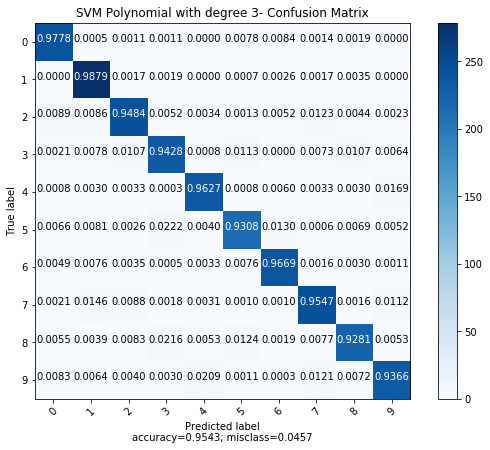

In [38]:
plot_confusion_matrix(avg_poly_d3, 
                      normalize    = True,
                      target_names = digits,
                      title        = "SVM Polynomial with degree 3- Confusion Matrix")

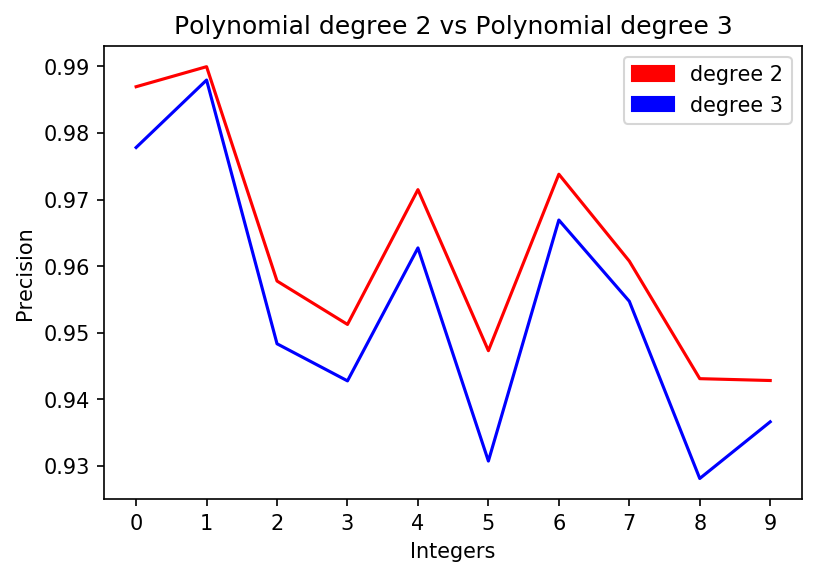

In [47]:
plt.plot(int, prob_poly_d2, color='red')
plt.plot(int, prob_poly_d3, color='blue')
plt.xlabel(digits)
plt.ylabel('Precision')
plt.title('Polynomial degree 2 vs Polynomial degree 3')
scale_plot_size(1.5)

green_line = mpatches.Patch(color='red', label='degree 2')
orange_line = mpatches.Patch(color='blue', label='degree 3')

plt.legend(handles=[green_line, orange_line])


plt.show()

## 2.4.4 Other kernels

As you can see below both Sigmoid and RBF kernels do not properly work for MNIST dataset. So these functions don't help us classify the digits.

### 2.4.4.1 Sigmoid Kernel

In [43]:
train_data, test_data, train_label, test_label = train_test_split(X, Y, test_size=0.25)

classifier = svm.SVC(kernel='sigmoid', gamma = 2)
classifier.fit(train_data, train_label)

predicted_ys = classifier.predict(test_data)
confusion_matrix(test_label,predicted_ys)

array([[  0, 256,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 260,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 274,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 220,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 244,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 253,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 246,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 239,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 249,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 259,   0,   0,   0,   0,   0,   0,   0,   0]], dtype=int64)

### 2.4.4.2 RBF

In [46]:
train_data, test_data, train_label, test_label = train_test_split(X, Y, test_size=0.25)
classifier = svm.SVC(kernel='rbf', gamma = 1.0 )
classifier.fit(train_data,train_label)

predicted_ys = classifier.predict(test_data)
confusion_matrix(test_label,predicted_ys)    

array([[  0, 264,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 279,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 262,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 238,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 243,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 233,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 243,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 255,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 239,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 244,   0,   0,   0,   0,   0,   0,   0,   0]], dtype=int64)

# 3. Logistic Regression

## 3.1 Introduction

Logistic Regression is a supervised model that uses logistic(or logit) function and works on binary dependent variables.  A linear model for only two y values would probably not give us the best results. However, a regression line, not linear but logistic, helps us predicting the probabilites of a possible outcome.

## 3.2 History

The logistic function was invented in the 19th century for the description of the growth of populations and the course of autocatalytic chemical reactions. Belgian astronomer Alphonso Quetelet and his student Pierre-François Verhulst had dealt with the problem and came up with the logistic function, which was named by Verhulst:

$ P(t) = \frac{exp(\alpha + \beta t)}{1 + exp(\alpha + \beta t)} $ [4]

where $ P(t) = W(t)/\Omega $ , W(t) is time of path, $ \beta = W'(t)/W(t) $, and $ W'(t) = \beta W(t)(\Omega-W(t)) $ and Omega is a constant.

Later, between 1838 and 1847 Verhulst did several corrections on the function, especially on Omega. In his paper, Verhulst practiced the function with the populations of Belgium and France, and made predictions. He believed that the population growth was best modelled by an exponential function.

Many years later, in 1920, Raymond Pearl and Lowell J. Reed discovered the logistic function. They were unaware of Verhulst’s papers first. In a 1922 paper, Verhulst was mentioned by Pearl and Reed for the first time. The old terminology was not used in the new article.  The name “logistic” was adopted again by Udny Yules’s publication in 1925.

In the following years it was approved that the logistic function would also work in wider statistical applications such as discriminant analysis, loglinear models, case-control studies and so on. The term “logistic regression” was introduced by the mathematician David Cox in his 1958 paper “Regression Analysis of Binary Sequences”. 

First page and a glance of the Cox’s paper:

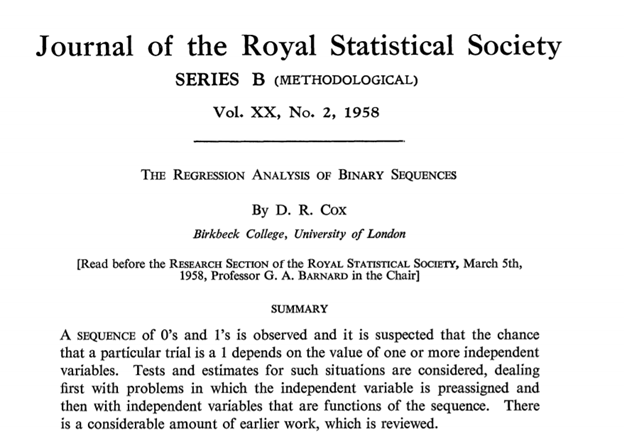

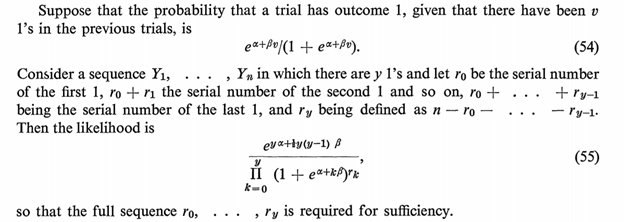

## 3.3 About the Method

### Concept of Odds

Probability is defined as an event occuring over all possible events. However the odds is the probability of an event occuring over the _other_ possible events.

\begin{align*}
odds = \frac{P(event)}{1-P(event)}
\end{align*}

The logit or the logistic function is defined as the natural logarithm of odds. It is represented with $ l $.

\begin{align*}
l = logit(p) = ln( \frac{p}{1-p}) 
\end{align*}

This is helpful because logit functions are symmetric. For example,

 \begin{align*}
 logit(p = 0.001) = -6.907 \quad while \quad logit(1-p) = l(0.999) = 6.907
 \end{align*}

Thus, probabilites of a specific data can be represented with a normal distribution. As you can see from the example above, a logit of a higher probability yields a positive number while a logit of a small probability gives a negative number. Also for a 1-1 odds situation we would have $ logit(1) = ln(1) = 0 $ which makes it very easy to understand and model the probabilites.

The logistic transformation is the inverse of the logit function. It is written as

\begin{align*}
p = logistic(l) = \frac{e’}{1+e’} 
\end{align*}

Also the difference between the logit function is shown as

\begin{align*}
l_1 - l_2 = \ & logit(p_1) - logit(p_2) \\
= \ & ln ( \frac{p_1}{1-p_1} ) - ln ( \frac{p_2}{1-p_2} ) \\
= \ & ln ( \frac{p_1(1-p_2)}{p_2(1-p_1)} ) \\
= \ & ln(OR_{1,2})
\end{align*}

And the inverse transformation is called the _odds ratio_.

\begin{align*}
\Longrightarrow \ OR_{1,2} = e^{(l_1-l_2)}
\end{align*}

[https://ncss-wpengine.netdna-ssl.com/wp-content/themes/ncss/pdf/Procedures/NCSS/Logistic_Regression.pdf]

### Logistic Regression

A basic model for the logistic regression becomes

\begin{align*}
logit(p(x)) = \beta_0 + x \cdot \beta
\end{align*}

To solve p, we then have

\begin{align*}
p(x; \ b, \ w) = \frac{e^{\ \beta_0 + x \cdot \beta}}{1+e^{\ \beta_0 + x \cdot \beta}} = \frac{1}{1+e^{\ - (\beta_0 + x \cdot \beta ) }}
\end{align*}

Because the Logistic regression method computes the probabilities we can also fit the model into a likelihood function. We have $ x_i $ as the inputs and $ y_i $ as the observed classes. Also if we take p as the probability of that specific class, then the likelihood is:

\begin{align*}
L(\beta_0, \beta) = \displaystyle\prod_{i=1}^{n} p(x_i)^{y_i}(1-p(x_i))^{1-y_i}
\end{align*}

Then if we apply the logit function to have the log-likelihood we get

\begin{align*}
l(\beta_0, \beta) = & \displaystyle\sum_{i=1}^{n} y_i log p(x_i) + (1-y_i) \ log1-p(x_i) \\
= & \displaystyle\sum_{i=1}^{n} log1 - p(x_i) + \displaystyle\sum_{i=1}^{n} y_i \ log \frac{p(x_i)}{1-p(x_i)} \\
= & \displaystyle\sum_{i=1}^{n} log1 - p(x_i) + \displaystyle\sum_{i=1}^{n} y_i (\beta_0 + x_i \cdot \beta) \\
= & \displaystyle\sum_{i=1}^{n} -log1 + e^{\beta_0 + x_i \cdot \beta} + \displaystyle\sum_{i=1}^{n} y_i (\beta_0 + x_i \cdot \beta)
\end{align*}

To find the maximum likelihood it is necessary to differentiate the log-likelihood we just found.

\begin{align*}
\frac{\partial l}{\partial \beta_j} = & - \displaystyle\sum_{i=1}^{n} \frac{1}{1 + e^{\beta_0 + x_i \cdot \beta}} e^{\beta_0 + x_i \cdot \beta} x_{ij} + \displaystyle\sum_{i=1}^{n} y_i x_{ij} \\ 
= & \displaystyle\sum_{i=1}^{n} (y_i - p(x_i; \beta_0 , \beta)) x_{ij}
\end{align*}

KONTROL ET BİR DAHA: [https://www.stat.cmu.edu/~cshalizi/uADA/12/lectures/ch12.pdf]

### Multinomial Logistic Regression

Since the general method of Logistic Regression works on binary data, we need a different way to approach datasets with more than 2 possible outcomes. Multinomial Logistic regression is an extension of logit models that help us classify multi-labeled data.

Suppose we have M classes. It means we need to have M-1 equations for each class. Thus, it is necessary to choose a reference category to compare them altogether. If the first class is chosen to be the reference, then for $ m = 2,…, M $ we get:

\begin{align*}
ln \frac{P(Y_i = m)}{P(Y_i = 1)} = \alpha_m + \displaystyle\sum_{k=1}^{K} \beta_{mk} X_{ik} = Z_{mi}  
\end{align*}

So, for each class we have M-1 reference log odds. This way also the probability function gets updated:

\begin{align*}
P(Y_i = m) = \frac{exp(Z_{mi}}{1+ \displaystyle\sum_{h=2}^{M} exp(Z_{hi})} \qquad \text For \ \ m = 2, ..., M 
\end{align*}

And for the class we take as the reference the probability function becomes:

\begin{align*}
P(Y_i = 1) = \frac{1}{1+ \displaystyle\sum_{h=2}^{M} exp(Z_{hi})}
\end{align*}

When M = 2 the Multinomail Linear Regression and regular Linear regression method become the same.

[https://www3.nd.edu/~rwilliam/statafiles/Mlogit1.pdf]

## 3.4 Application on MNIST

Like the SVM method, Logistic Regression is applied on MNIST dataset randomly for 15 times. What the code below does is, the test and train data are randomly generated from the main data with 1 to 3 ratio.  After fitting the model to the classifier, predictions according to the Logistic regression method is gathered in an array. Out of these 15 iterations all predictions are converted into a confusion matrix which stores all of the inputs. Also it is possible to check the duration of the algorithm.

In [48]:
logisticRegr = LogisticRegression()

In [49]:
start = time.time()

sum_log_res = np.zeros((10,10))
total_test_label = np.zeros((37500))
total_predicted_ys = np.zeros((37500))

classifier = LogisticRegression()

for i in range(15):
    train_data, test_data, train_label, test_label = train_test_split(X, Y, test_size=0.25)
    classifier.fit(train_data, train_label)
    
    predicted_ys = classifier.predict(test_data)
    sum_log_res = sum_log_res + confusion_matrix(test_label,predicted_ys)
      
    total_test_label[(i*2500):((i+1)*2500)] = test_label
    total_predicted_ys[(i*2500):((i+1)*2500)] = predicted_ys
    
end = time.time()
time_logres = end - start
print(time_logres)

1896.0518398284912


Now it is possible to observe the precision, recall, f1-score and support values of the classifiction report

In [50]:
print(classification_report(total_test_label, total_predicted_ys))

             precision    recall  f1-score   support

        0.0       0.93      0.91      0.92      3643
        1.0       0.96      0.94      0.95      4088
        2.0       0.81      0.82      0.81      3894
        3.0       0.80      0.79      0.80      3828
        4.0       0.90      0.88      0.89      3767
        5.0       0.74      0.74      0.74      3321
        6.0       0.92      0.89      0.90      3630
        7.0       0.90      0.87      0.88      3903
        8.0       0.67      0.79      0.73      3645
        9.0       0.84      0.81      0.83      3781

avg / total       0.85      0.85      0.85     37500



Confusion matrix is visualized below

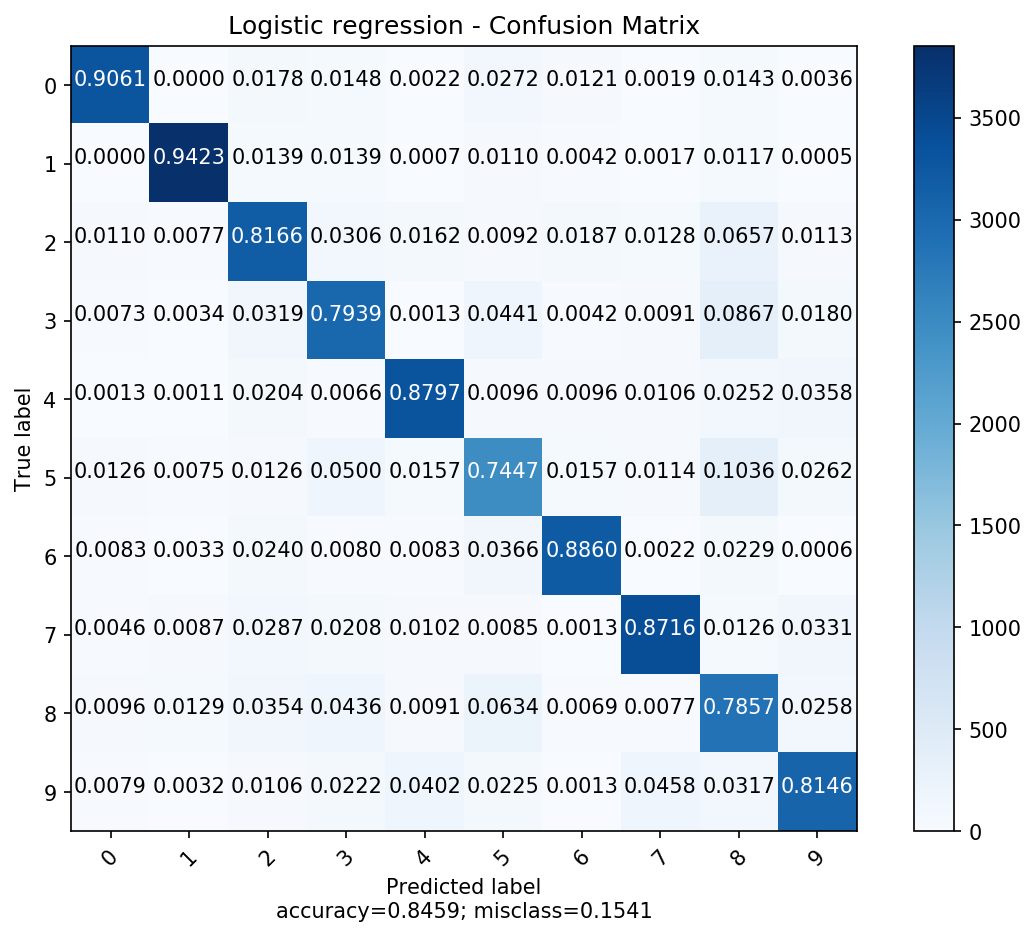

In [51]:
plot_confusion_matrix(sum_log_res, 
                      normalize    = True,
                      target_names = digits,
                      title        = "Logistic regression - Confusion Matrix")

During the process of the Logistic regression over MNIST dataset we had stored all the outputs in a 10*10 matrix. Here are the average values of the confusion matrix:

In [53]:
sum_log_res = np.around(sum_log_res)
avg_log_res = sum_log_res/15
print(avg_log_res)

[[220.067 0.000 4.333 3.600 0.533 6.600 2.933 0.467 3.467 0.867]
 [0.000 256.800 3.800 3.800 0.200 3.000 1.133 0.467 3.200 0.133]
 [2.867 2.000 212.000 7.933 4.200 2.400 4.867 3.333 17.067 2.933]
 [1.867 0.867 8.133 202.600 0.333 11.267 1.067 2.333 22.133 4.600]
 [0.333 0.267 5.133 1.667 220.933 2.400 2.400 2.667 6.333 9.000]
 [2.800 1.667 2.800 11.067 3.467 164.867 3.467 2.533 22.933 5.800]
 [2.000 0.800 5.800 1.933 2.000 8.867 214.400 0.533 5.533 0.133]
 [1.200 2.267 7.467 5.400 2.667 2.200 0.333 226.800 3.267 8.600]
 [2.333 3.133 8.600 10.600 2.200 15.400 1.667 1.867 190.933 6.267]
 [2.000 0.800 2.667 5.600 10.133 5.667 0.333 11.533 8.000 205.333]]


And the normalized matrix:

In [54]:
normalized_log_res = normalize(avg_log_res, axis=1, norm='l1')
normalized_log_res = np.around(normalized_log_res,3)
print(normalized_log_res)

[[0.906 0.000 0.018 0.015 0.002 0.027 0.012 0.002 0.014 0.004]
 [0.000 0.942 0.014 0.014 0.001 0.011 0.004 0.002 0.012 0.000]
 [0.011 0.008 0.817 0.031 0.016 0.009 0.019 0.013 0.066 0.011]
 [0.007 0.003 0.032 0.794 0.001 0.044 0.004 0.009 0.087 0.018]
 [0.001 0.001 0.020 0.007 0.880 0.010 0.010 0.011 0.025 0.036]
 [0.013 0.008 0.013 0.050 0.016 0.745 0.016 0.011 0.104 0.026]
 [0.008 0.003 0.024 0.008 0.008 0.037 0.886 0.002 0.023 0.001]
 [0.005 0.009 0.029 0.021 0.010 0.008 0.001 0.872 0.013 0.033]
 [0.010 0.013 0.035 0.044 0.009 0.063 0.007 0.008 0.786 0.026]
 [0.008 0.003 0.011 0.022 0.040 0.022 0.001 0.046 0.032 0.815]]


The ratios of the correctly guessed digits:

In [55]:
prob_log_res = digit_probability(normalized_log_res)    

for i in range(10):
    print(i, end=" => ") 
    print(prob_log_res[i])   

0 => 0.906
1 => 0.942
2 => 0.817
3 => 0.794
4 => 0.88
5 => 0.745
6 => 0.886
7 => 0.872
8 => 0.786
9 => 0.815


The top three misclassification can be read from the sentence below:

In [56]:
maximum_misidentification(normalized_log_res)

Apart from the diagonal elements of the confusion matrix:
While predicting the integer 5 , 10.4 % of the times the algorithm misidentified it as 8 and
while predicting the integer 8 , 6.3 % of the times the algorithm misidentified it as 5 and
while predicting the integer 9 , 4.6 % of the times the algorithm misidentified it as 7 .


# 4. Neural Network

Açıklama

## 4.1 Introduction

## 4.2 History

In 1943 a paper was written by Warren S. McCulloch and Walter H. Pitts who were
neurophysiologist and mathematician respectively. This was the first emergence of the neurons that
could take part in computaional logic. The pictures below are from that paper.
[https://cs.stanford.edu/people/eroberts/courses/soco/projects/neural-networks/History/history1.html]

Until 1970’s the research on neurons went on. Donald O. Hebb, Marvin Minsky, Bernard Widrow, Seymour Papert were among the people who contributed in the study of neural networks. In 1985 John Hopfield claimed he found a way to solve the Travelling Salesman problem with Hopfield nets. His publications drew attention and showed a great development in the field. Since then, neural network took a huge place in classification and prediction models. For many years it is being researched and developed in many ways. And today it is one of the hot topics of Machine Learning.

[http://www.dkriesel.com/_media/science/neuronalenetze-en-zeta2-1col-dkrieselcom.pdf]

## 4.3 About the Method

Neural Network is a classification model represented by a network diagram which is actually a directed graph of perceptron.
[The Elements of Statistical Learning Data Mining, Inference, and Prediction]

### What is a perceptron?

Perceptron is a simple layer of weights which connects the input and output. Basically it is defined by 

\begin{align*}
y = sign(w^Tx-\theta)
\end{align*}

where w represents the weight and $ \ \theta \ $ represents the bias value. A simple perceptron architecture looks like this:

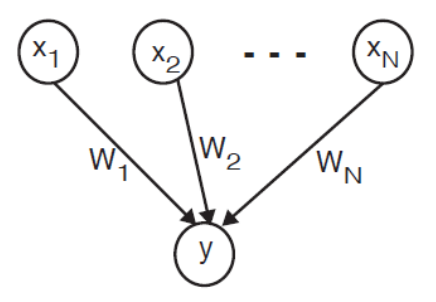

X values are multiplied by specific weights they are connected to and then summed together to have the new y value which is the output in this very simple example of perceptron.
[Introduction: The Perceptron, Haim Sompolinsky, MIT]

The usual neural network is achieved when we have multiple layers of these perceptrons and then the model looks like this:

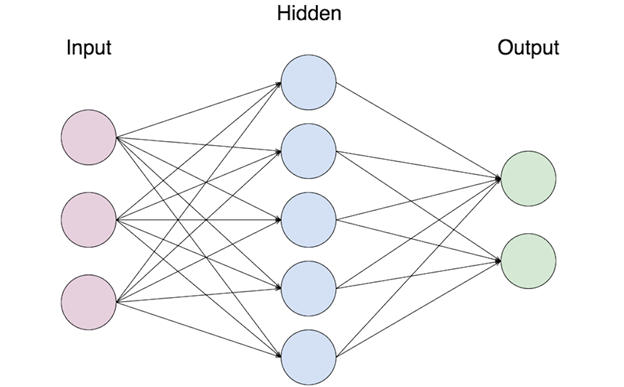

PARAPHRASE ET: The middle layer is called the hidden layer because they are not directly observed.  

The general formula in the feedforward stage of neural network is

\begin{align*}
    a_i = g(\displaystyle\sum_{j} w_{j,i}a_j)
\end{align*}

where the index $ i $ indicates the next layer and g is the activation function.

So for every layer with the index $ i $ the connected inputs are multiplied with the assigned weights and summed up. Then the summed value is put in the activation function. The result becomes the new value of the next layer.

What is activation function? It is a function that we use to map the results between 0 and 1 or -1 to 1 depending on the function. Sigmoid function is usually chosen to be the activation function.

\begin{align*}
g(v) = \frac{1}{1+e^{-v}}
\end{align*}

[The Elements of Statistical Learning Data Mining, Inference, and Prediction]

Batch is the number of samples to work with in neural network. After a batch is processed, the weights are updated. In the same way epoch represents the number of times the batch goes through the algorithm.

## 4.3 Application on MNIST

Buraya kod gelecek

In [69]:
import pandas as pd
import numpy as np
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import Normalizer

from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, Conv1D, Conv2D, Flatten, MaxPooling2D
from keras.optimizers import Adam, Adamax, RMSprop, SGD

import keras.backend as K
import keras as keras

In [215]:
train_data, test_data, train_label, test_label = train_test_split(X, Y, test_size=0.25)

In [216]:
len(train_data)

7500

In [217]:
len(train_label)

7500

In [218]:
model = Sequential()

model.add(Conv2D(56, (3,3), input_shape=(28,28,1,), activation='tanh'))

In [219]:
model.add(Dense(28,activation='relu'))
model.add(Dropout(0.25))

In [220]:
model.add(Flatten())
model.add(Dense(40, activation='sigmoid'))
model.add(Dropout(0.05))

In [221]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_30 (Conv2D)           (None, 26, 26, 56)        560       
_________________________________________________________________
dense_46 (Dense)             (None, 26, 26, 28)        1596      
_________________________________________________________________
dropout_52 (Dropout)         (None, 26, 26, 28)        0         
_________________________________________________________________
flatten_27 (Flatten)         (None, 18928)             0         
_________________________________________________________________
dense_47 (Dense)             (None, 40)                757160    
_________________________________________________________________
dropout_53 (Dropout)         (None, 40)                0         
Total params: 759,316
Trainable params: 759,316
Non-trainable params: 0
_________________________________________________________________


Below you can see the process of neural network on MNIST dataset. ...

In [222]:
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'], optimizer='RMSProp')
model.fit(train_data.reshape(len(train_data),28,28,1), train_label, batch_size=500, epochs=10)

Epoch 1/10
7500/7500 [==============================] - 8s 1ms/step - loss: 3.0606 - acc: 0.3360
Epoch 2/10
7500/7500 [==============================] - 6s 810us/step - loss: 2.8430 - acc: 0.3437
Epoch 3/10
7500/7500 [==============================] - 6s 795us/step - loss: 2.5350 - acc: 0.2592
Epoch 4/10
7500/7500 [==============================] - 6s 804us/step - loss: 1.9604 - acc: 0.2628
Epoch 5/10
7500/7500 [==============================] - 6s 805us/step - loss: 0.7142 - acc: 0.8627
Epoch 6/10
7500/7500 [==============================] - 6s 808us/step - loss: 0.3893 - acc: 0.9083
Epoch 7/10
7500/7500 [==============================] - 6s 813us/step - loss: 0.3058 - acc: 0.9277
Epoch 8/10
7500/7500 [==============================] - 6s 820us/step - loss: 0.3003 - acc: 0.9292
Epoch 9/10
7500/7500 [==============================] - 6s 819us/step - loss: 0.2551 - acc: 0.9421
Epoch 10/10
7500/7500 [==============================] - 6s 803us/step - loss: 0.2557 - acc: 0.9397


# 5. Analysis of the Methods

Açıklama

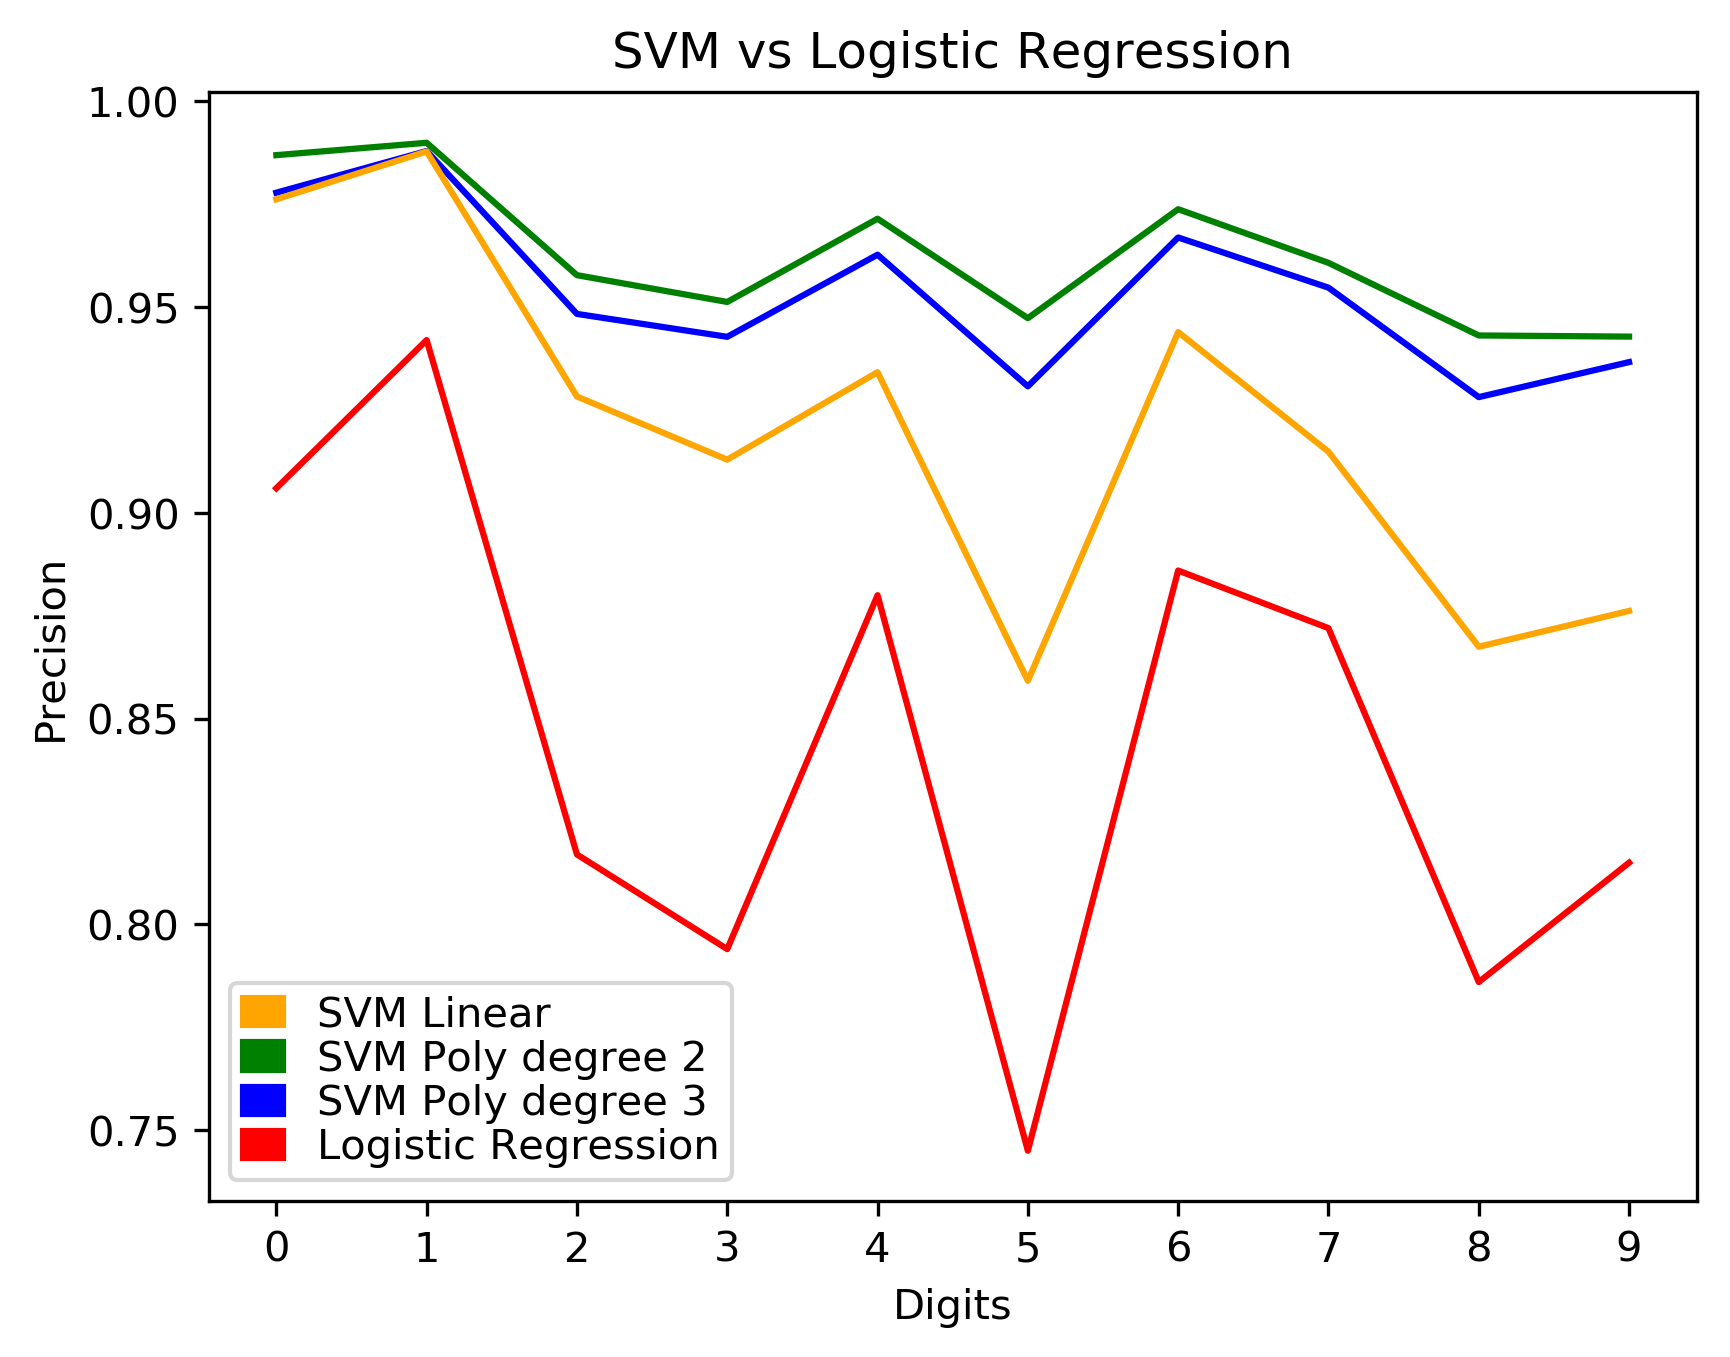

In [139]:
prob_log_res = np.round(prob_log_res,3)

plt.plot(int, prob_poly_d3, color='blue')
plt.plot(int, prob_poly_d2, color='g')
plt.plot(int, prob_linear, color='orange')
plt.plot(int, prob_log_res, color = 'red')
plt.xlabel('Digits')
plt.ylabel('Correct Prediction Percentage')
plt.title('SVM vs Logistic Regression')
scale_plot_size(3)

green_line = mpatches.Patch(color='g', label='SVM Poly degree 2')
orange_line = mpatches.Patch(color='orange', label='SVM Linear ')
red_line = mpatches.Patch(color='red', label='Logistic Regression')
blue_line = mpatches.Patch(color = 'blue', label = 'SVM Poly degree 3')
plt.legend(loc = 'lower left', borderpad = 0.3, handlelength=1, labelspacing = 0.1, handles=[orange_line, green_line, blue_line, red_line])


plt.show()

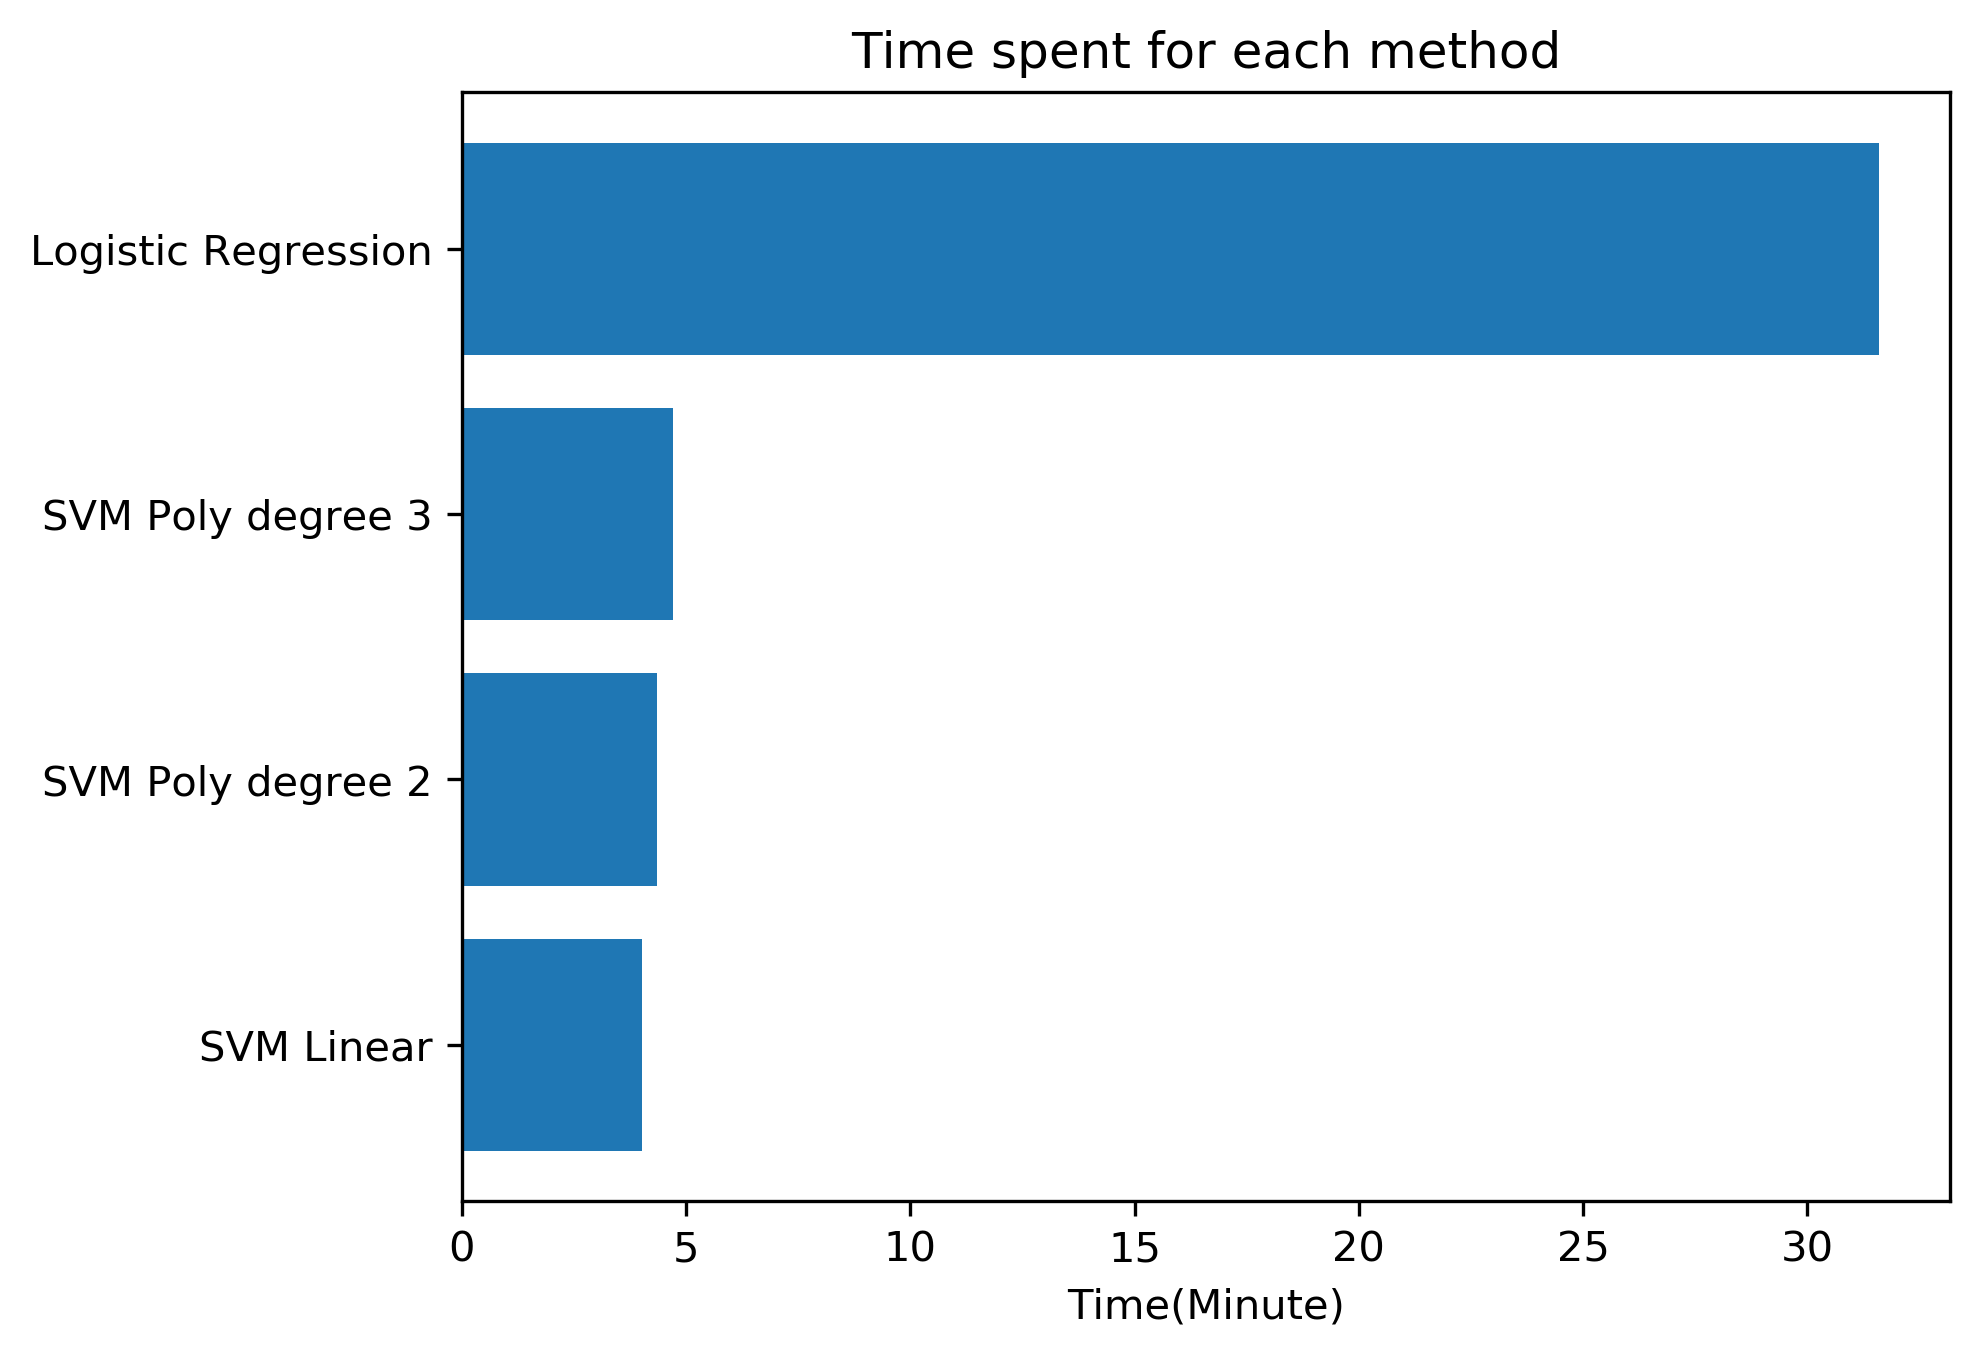

In [136]:
import numpy as np
import matplotlib.pyplot as plt
 
names = ['SVM Linear','SVM Poly degree 2','SVM Poly degree 3', 'Logistic Regression']
y_pos = np.arange(len(names))
counts = [time_linear, time_poly_d2, time_poly_d3, time_logres]

for i in range(4):
    counts[i] = counts[i]/60.0
 
plt.barh(y_pos, counts, align='center')
plt.yticks(y_pos, names)
plt.xlabel('Time(Minute)')
plt.title('Time spent for each method')
 
plt.show()

# FUNCTIONS

Functions, especially the long ones, used in this work are introduced here. They should be ran before the things above are activated. This is made because the definitions and contents of the functions are too long and they may be distracting among other codes.

## Maximum Misidentifiaction

Maximum Misidentifiaction function finds the top three misidentified digits and their percentages. The main purpose is to see, apart from the sucessful predictions, for which digits the algorithm makes the most mistakes. It takes the confusion matrix as an input and finds the maximum $ C_{ij} $ values where $ i \neq j $.

In [26]:
def maximum_misidentification(matrix):
    max = 0
    max2 = 0
    max3 = 0
    for i in range(10):
        for j in range(10):
            if (matrix[i,j] > max and i != j):
                max = matrix[i,j]
                real = i
                predicted = j
    for k in range(10):
        for l in range(10):
            if (matrix[k,l] > max2 and k != l and (k != real and l != predicted)):
                max2 = matrix[k,l]
                real2 = k
                predicted2 = l
                
    for m in range(10):
        for n in range(10):
            if (matrix[m,n] > max3 and m != n and (m != real and n != predicted) and (m != real2 and n != predicted2)):
                max3 = matrix[m,n]
                real3 = m
                predicted3 = n
            
    max = max*100
    max = np.around(max, 3)
    
    print("Apart from the diagonal elements of the confusion matrix:")
    print("While predicting the digit", 
          real, 
          ",", 
          max, 
          "% of the times the algorithm misidentified it as", 
          predicted, 
          "and")
    
    max2 = max2*100
    max2 = np.around(max2, 3)
    print("while predicting the digit", 
          real2, 
          ",", 
          max2, 
          "% of the times the algorithm misidentified it as", 
          predicted2, 
          "and")
    
    max3 = max3*100
    max3 = np.around(max3, 3)
    print("while predicting the digit", 
          real3, 
          ",", 
          max3, 
          "% of the times the algorithm misidentified it as", 
          predicted3, 
          ".")

## Plot Confusion Matrix

Plot Confusion Matrix is a function which basically illustrates the confusion matrix in a nice way. For all the methods or kernels used, this function is applied to see the predicted values whether correct or wrong. The function applies the blue color for visualization. Higher the percentage higher the color density. This function is taken from scikit-learn.org as it is cited in the first lines of the function.

In [25]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

# REFERENCES

[1] https://en.wikipedia.org/wiki/MNIST_database

[2] http://yann.lecun.com/exdb/mnist/

[3] https://www.semanticscholar.org/paper/NIST-form-based-handprint-recognition-system-2.0)-Garris-Blue/3cb00eaa2b49771ee2b86771f64a7bdea4bd4bed

[4] The Origins of Logistic Regression, J.S. Cramer, Tinbergen Institute 2002